In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [2]:
df = pd.read_csv(url)
df.head()
df.shape

(25, 2)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


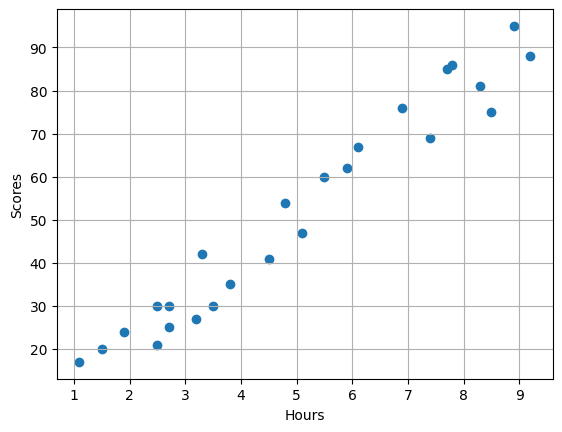

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x = df[['Hours']].values
y = df['Scores'].values

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(10,input_dim=1,activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss='mse')

In [11]:
model.fit(x_train,y_train,epochs=200,verbose=0)

In [12]:
h = model.fit(x_train,y_train,epochs=200,verbose=0)

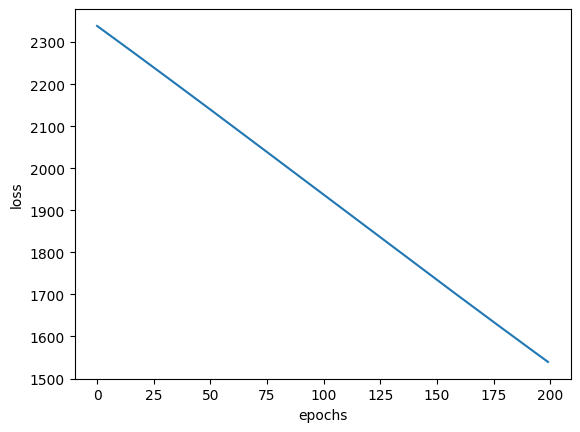

In [13]:
plt.plot(h.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [14]:
predicted = model.predict(x_test)
for i in range(len(x_test)):
  print(f"Hours: {x_test[i][0]}")
  print(f"Predicted Score: {predicted[i][0]:.2f}")
  print(f"Actual Score: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Hours: 1.5
Predicted Score: 7.41
Actual Score: 20
Hours: 3.2
Predicted Score: 12.69
Actual Score: 27
Hours: 7.4
Predicted Score: 25.75
Actual Score: 69
Hours: 2.5
Predicted Score: 10.52
Actual Score: 30
Hours: 5.9
Predicted Score: 21.09
Actual Score: 62


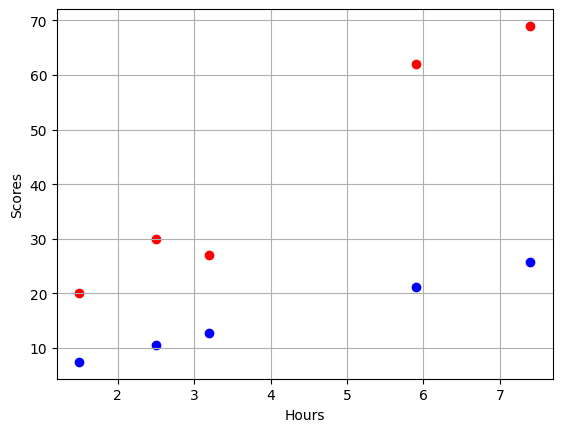

In [16]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,predicted,color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

In [18]:
## we can decrease the loss by increasing the epochs or adding another hidden layer